In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import shapely 
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [6]:
import os
try:
    os.mkdir("images")
except:
    pass

In [140]:
#minimum distance to the beampipe
clearance=0.5

#gap between left and right halves
LRgap=0.4




#new version... calculate based on the shadow of the ECal
ECAL_clearance_TB=2.3
ECAL_clearance_L=2.2
ECAL_clearance_R=4.1

ECAL_support_width=0.5

flange_radius=(4.3707*2.54)/2
flange_width=(5.9919)*2.54


print(f"ECal hole size: {flange_radius*2+ECAL_clearance_TB-ECAL_support_width*2:.2f} x {flange_width+ECAL_clearance_L+ECAL_clearance_R-2*ECAL_support_width} cm^2")
#Moliere_radius=2.1
#nMol=2
#outer_radius = (flange_radius+ECAL_clearance)*320/194+Moliere_radius*nMol  #two moliere radii from the edge of the shadow of the ECAL endcap
#horizontal_extension=(flange_width-2*flange_radius)*320/194
#print(f"outer radius is {outer_radius:.2f}")
#print(f"horizontal_extension is {horizontal_extension:.2f}")

det_height=30
det_width=40


#position="pre-flange"
position="HCAL+10cm"

if position == "pre-flange":
    #radii and positions of holes
    R1=4.281
    X1=0
    R2=1.574
    X2=6.825
    z_downstream=-269.72 # downstream face, at flange
elif position == "pre-HCAL":
    #radii and positions of holes
    #R1=4.4922
    #X1=0
    #R2=2.223
    #X2=8.2406
    z_downstream=-329.6 # downstream face, in front of the HCal
    X1=0
    R1=4.281+(4.21-4.281)*(z_downstream-(-269.72))/14.21
    R2=1.574+(1.519-1.574)*(z_downstream-(-269.72))/14.21
    X2=6.825+(6.407-6.825)*(z_downstream-(-269.72))/14.21
    print(f"R1={R1:.3f}\nR2={R2:.3f}\nX1={X1:.3f}\nX2={X2:.3f}")
elif position == "HCAL+10cm":
    #radii and positions of holes
    #R1=4.4922
    #X1=0
    #R2=2.223
    #X2=8.2406
    z_downstream=-329.6+10 # downstream face, with 10 cm space in front of the HCa
    X1=0
    R1=4.281+(4.21-4.281)*(z_downstream-(-269.72))/14.21
    R2=1.574+(1.519-1.574)*(z_downstream-(-269.72))/14.21
    X2=6.825+(6.407-6.825)*(z_downstream-(-269.72))/14.21
    print(f"R1={R1:.3f}\nR2={R2:.3f}\nX1={X1:.3f}\nX2={X2:.3f}")

ECal hole size: 12.40 x 20.519426000000003 cm^2
R1=4.530
R2=1.767
X1=0.000
X2=8.292


In [75]:
def get_theta(eta):
    return 2*np.arctan(np.exp(-eta))
def get_eta(theta):
    return -np.log(np.tan(theta/2))

In [76]:
def rect(x1,y1, x2,y2):
    return shapely.Polygon([(x1,y1), (x2,y1), (x2, y2),(x1,y2), (x1,y1)])

4.530224489795917 1.7670612244897965
veto zone area: 523 cm^2
tot area: 1101 cm^2


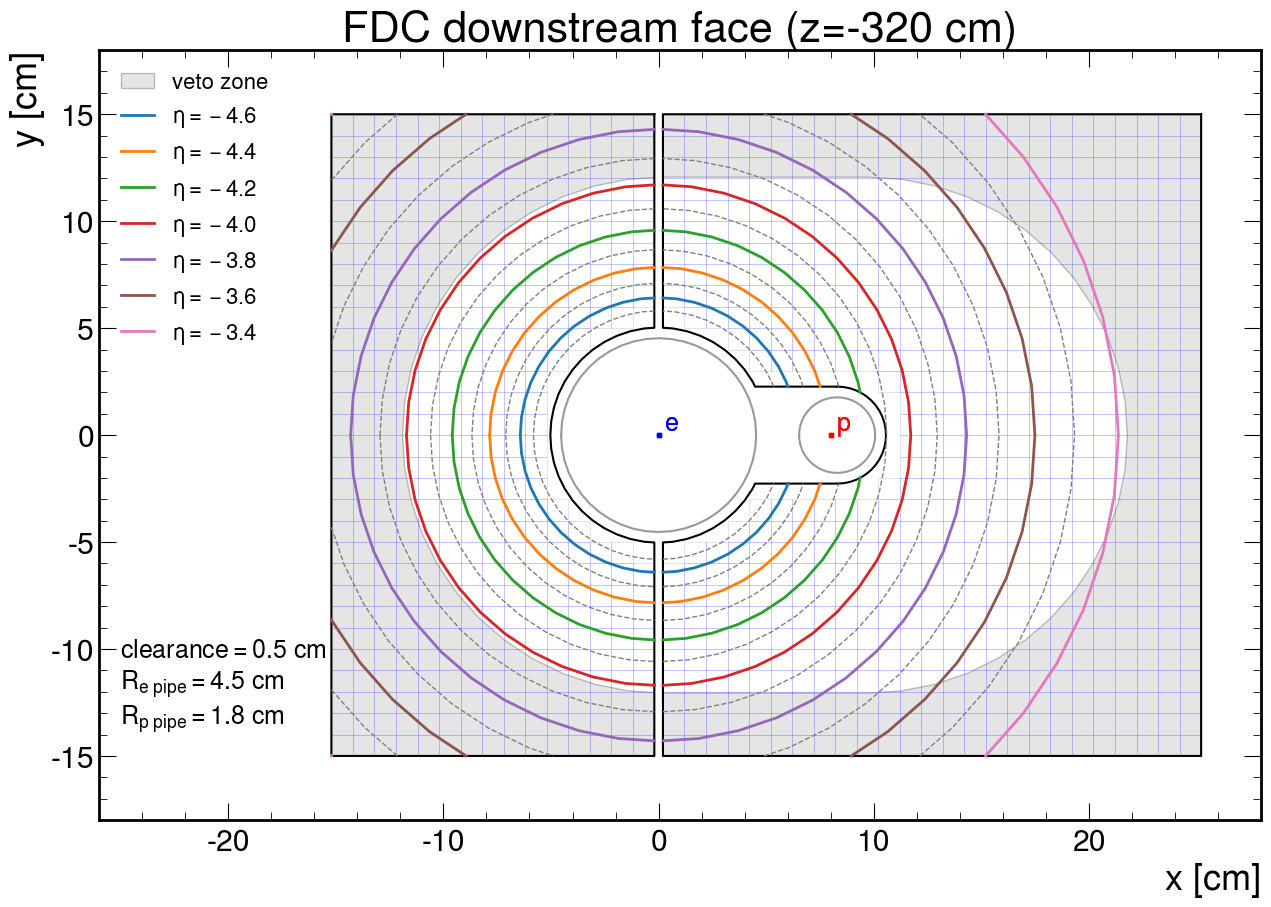

veto zone area: 523 cm^2
tot area: 1101 cm^2


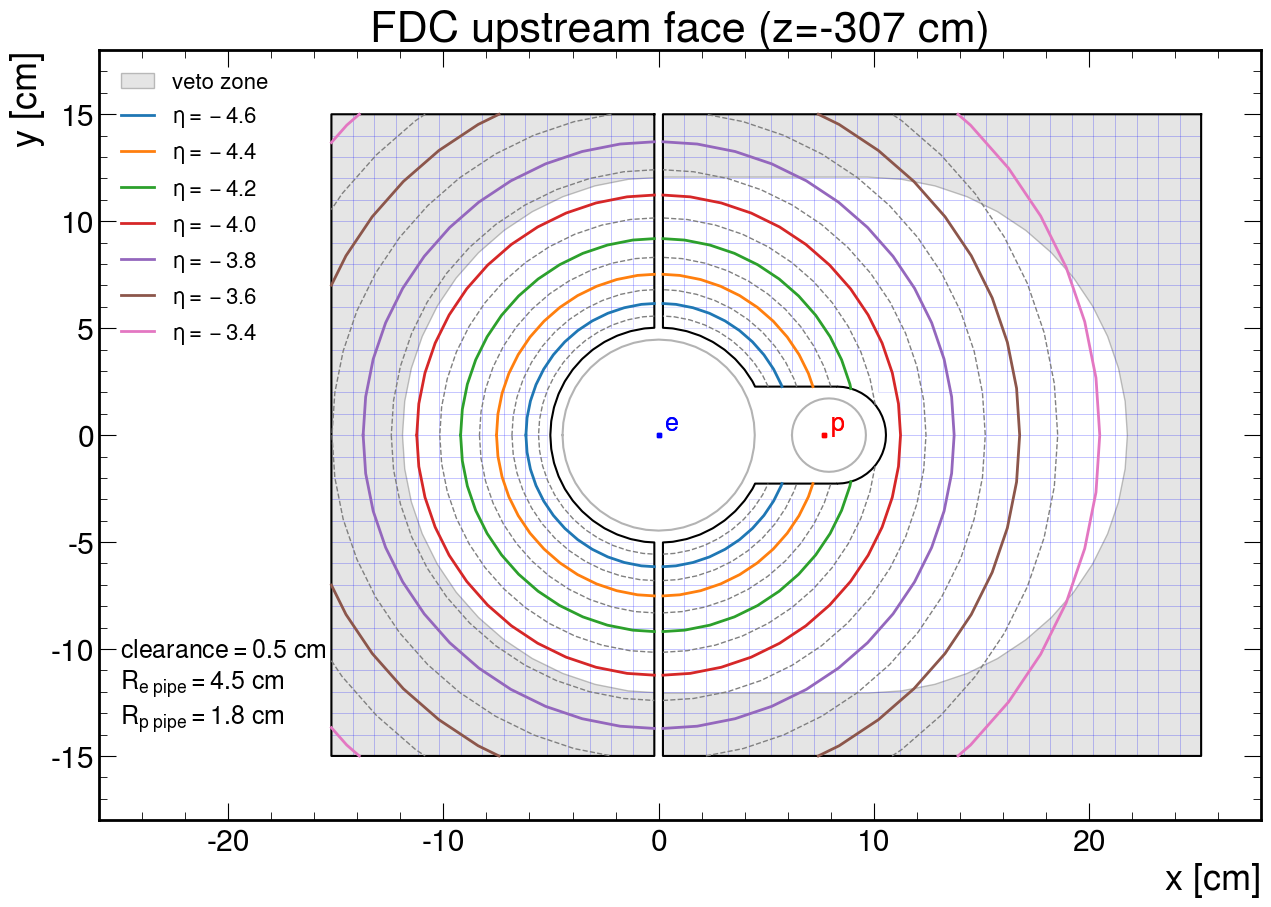

4.530224489795917 1.7670612244897965
veto zone area: 523 cm^2
tot area: 1101 cm^2


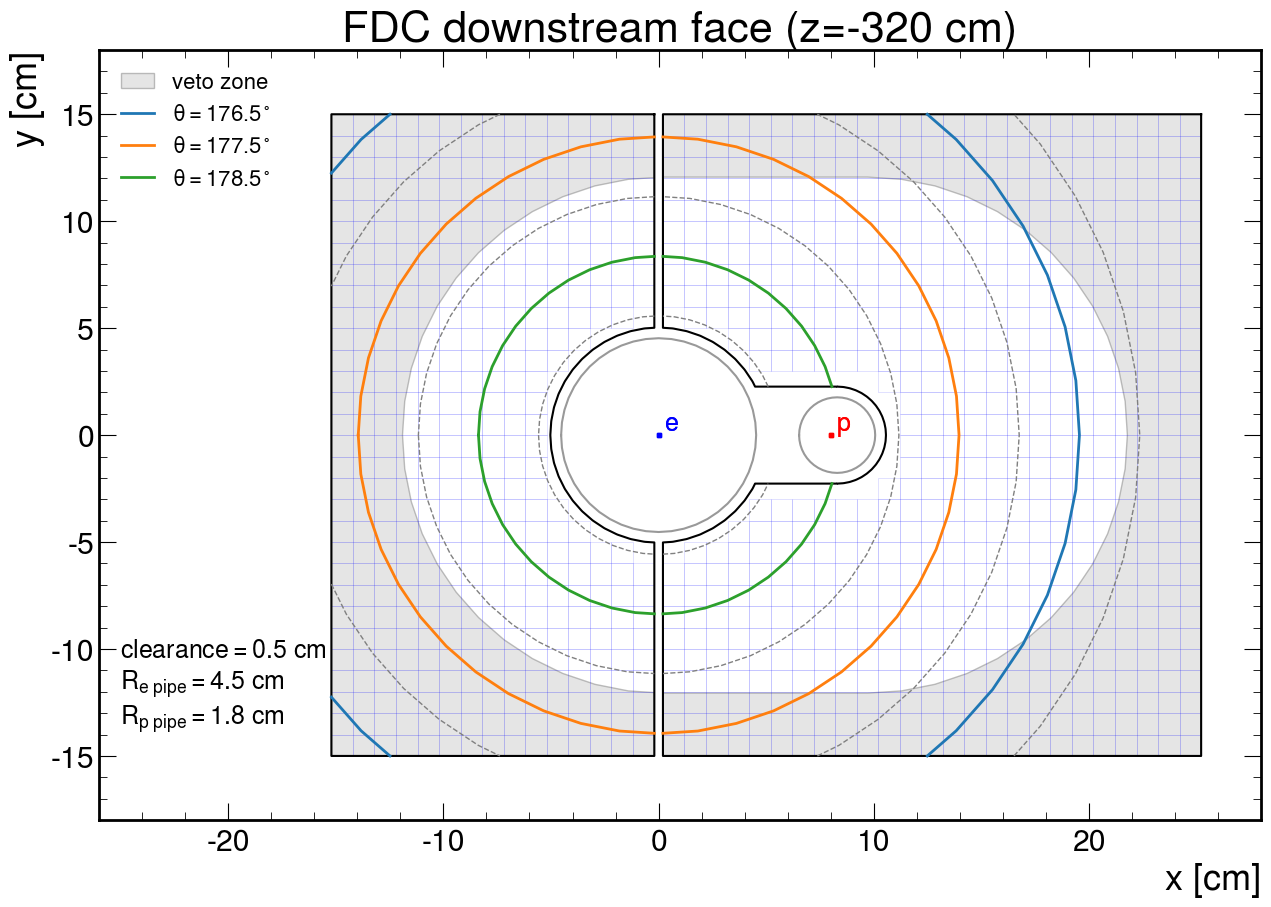

veto zone area: 523 cm^2
tot area: 1101 cm^2


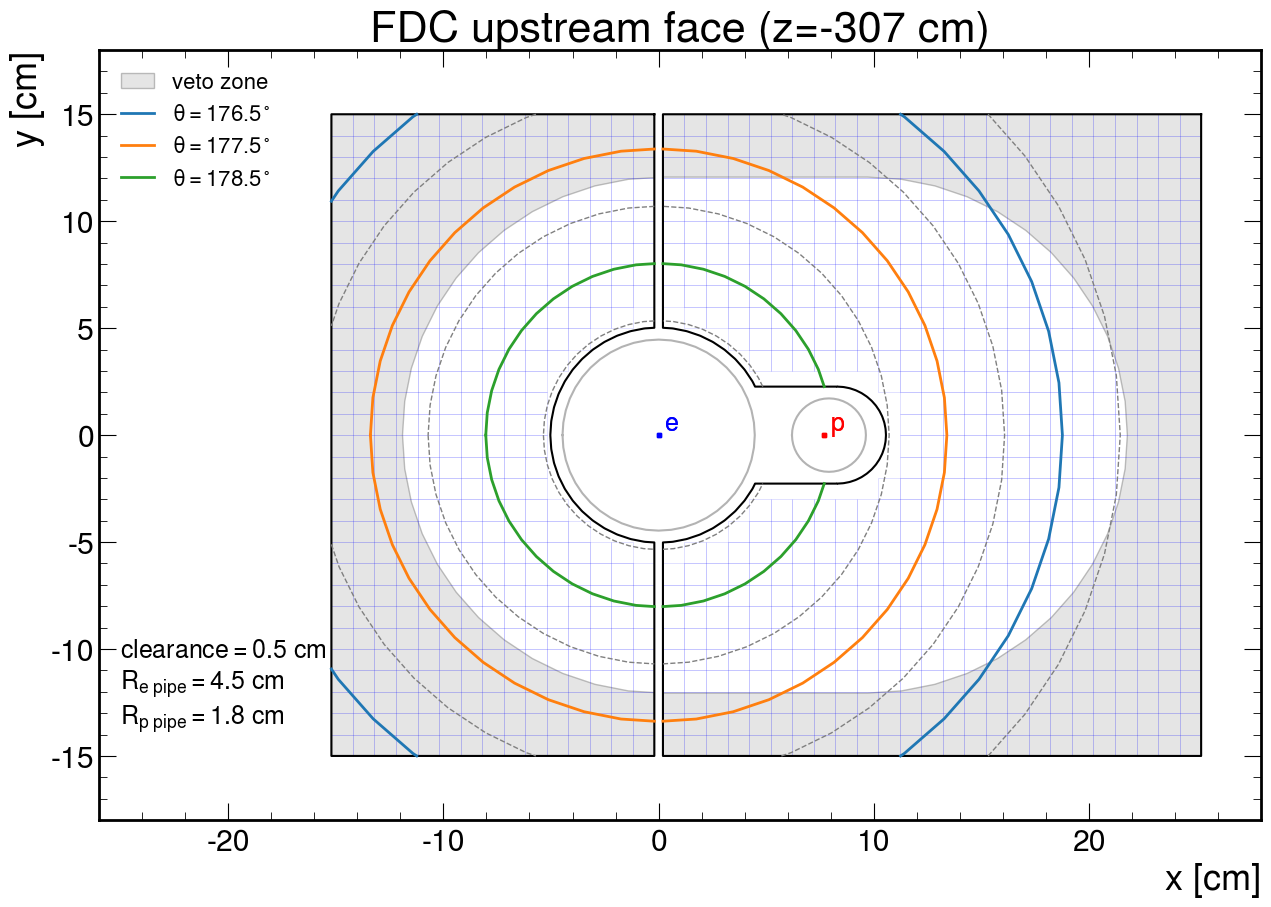

In [106]:
def eta_plot(pos='downstream', var='eta', showMoliere=False, moliereRadius=2.1, pix=True, shape='rect'):
    veto_area=0
    tot_area=0
    plt.subplots(1,1, figsize=(15,10))
    phi=np.linspace(-np.pi, np.pi, 49)
    pipe1=shapely.Polygon(zip(R1*np.cos(phi), R1*np.sin(phi)))
    pipe2=shapely.Polygon(zip(R2*np.cos(phi)+X2, R2*np.sin(phi)))

    
    
    
    
    
    hole=pipe1.buffer(clearance) | pipe2.buffer(clearance)
    #now for the flat extension:
    hole |=rect(0, -R2-clearance, X2, R2+clearance)#shapely.Polygon([(0,-R2-clearance), (X2,-R2-clearance), (X2,R2+clearance),(X2,0), (0,0)])

    
    
    #if shape=='rect':
    #    left_half=rect(LRgap/2, det_height/2, LRgap/2+det_width/2, -det_height/2)-hole
    #    right_half=rect(-LRgap/2, det_height/2, -LRgap/2-det_width/2, -det_height/2)-hole
    #    both_halves=left_half | right_half
    if shape=='circ':
        both_halves=shapely.Polygon(zip(outer_radius*np.cos(phi), outer_radius*np.sin(phi))) \
                -hole - rect(-LRgap/2, -outer_radius, LRgap/2, outer_radius)
        left_half = both_halves.geoms[0]
        right_half = both_halves.geoms[1]
    elif shape=='racetrack':
        circ1 = shapely.Polygon(zip(outer_radius*np.cos(phi), outer_radius*np.sin(phi)))
        rect1=  rect(0, -outer_radius, horizontal_extension, outer_radius)
        circ2 = shapely.Polygon(zip(horizontal_extension+outer_radius*np.cos(phi), outer_radius*np.sin(phi)))
        both_halves=(circ1 | rect1 | circ2) \
                -hole - rect(-LRgap/2, -outer_radius*1.1, LRgap/2, outer_radius*1.1)
        left_half = both_halves.geoms[0]
        right_half = both_halves.geoms[1]
    elif shape=='rect':
        #outer_radius=det
        rect1 = rect(-det_height/2-LRgap/2, -det_height/2, det_width-det_height/2+LRgap/2, det_height/2)
        
        both_halves=rect1 \
                -hole - rect(-LRgap/2, -det_height/2, LRgap/2, det_height/2)
        left_half = both_halves.geoms[0]
        right_half = both_halves.geoms[1]
    arg=dict(color='k')
    plt.plot(*left_half.exterior.xy,**arg)
    plt.plot(*right_half.exterior.xy,**arg)
    #for half in left_half, right_half:
        #print(half.exterior.xy)
    #    plt.gca().add_patch(\
    #        mpl.patches.Polygon(list(zip(*half.exterior.xy)), color='0.7', alpha=0.1))
    
    
    
    
    
    z=z_downstream
    if pos=="upstream":
        z+=(0.35+0.2+0.08)*20+0.35
    #draw beampipes
    if pos=='downstream':
        arg=dict(color='0.6')
        plt.plot(*pipe1.exterior.xy, **arg)
        plt.plot(*pipe2.exterior.xy, **arg)
        print(R1, R2)
    else :
        #evaluate beampipe position, radius at upstream z
        R1us=4.281+(4.21-4.281)*(z-(-269.72))/14.21
        R2us=1.574+(1.519-1.574)*(z-(-269.72))/14.21
        X2us=6.825+(6.407-6.825)*(z-(-269.72))/14.21
        #print(R1us, R2us)
        arg=dict(color='0.7')
        plt.plot(R1us*np.cos(phi), R1us*np.sin(phi), **arg)
        plt.plot(R2us*np.cos(phi)+X2us, R2us*np.sin(phi), **arg)
    
    #ECAL
    #inner radius of the support
    ECAL_radius=flange_radius+ECAL_clearance_TB-ECAL_support_width
    ECAL_width=flange_width+ECAL_clearance_R+ECAL_clearance_L-2*ECAL_support_width
    ECAL_offset_L=-ECAL_clearance_L+ECAL_clearance_TB
    ECAL_offset_R=ECAL_width-2*ECAL_radius+ECAL_offset_L
    
    s=320/195
    circ1 = shapely.Polygon(zip(s*ECAL_radius*np.cos(phi)+s*ECAL_offset_L, s*ECAL_radius*np.sin(phi)))
    circ2 = shapely.Polygon(zip(s*ECAL_radius*np.cos(phi)+s*ECAL_offset_R, s*ECAL_radius*np.sin(phi)))
    rect1= rect(ECAL_offset_L*s, -s*ECAL_radius, ECAL_offset_R*s, s*ECAL_radius)
    ECAL_shadow = circ1 | circ2 | rect1
    
    for i, half in enumerate([left_half, right_half]):
        half_veto_region=(half-ECAL_shadow)
        xy=list(zip(*half_veto_region.exterior.xy))
        xy.append(xy[0])
        veto_area+=half_veto_region.area
        plt.gca().add_patch(\
            mpl.patches.Polygon(xy, color='0.8', alpha=0.5, label=f'veto zone' if i==1 else None,\
                               zorder=-5, ls='-',ec='0.5'))
        
    print(f"veto zone area: {veto_area:.0f} cm^2")
    print(f"tot area: {both_halves.area:.0f} cm^2")
    #now determine the shape of the shadow:
    #shadow_r = ECAL_radius*np.abs(z)/194
    
    
    
    #show 1 Moliere radius from edge
    if showMoliere =='outline':
        plt.plot(*right_half.buffer(-moliereRadius).exterior.xy,color='0.5',
                 label=f'1 $R_{{M}}$ ({moliereRadius:.1f} cm)\nfrom edge', ls=':')
        plt.plot(*left_half.buffer(-moliereRadius).exterior.xy,color='0.5', ls=':')
    if showMoliere =='arrow':
        c='0.3'
        plt.plot([-clearance-R1,-clearance-R1-moliereRadius], [0,0] ,color=c, zorder=10)
        tmp=-clearance-R1-moliereRadius
        ah=0.25
        plt.plot([tmp+ah, tmp, tmp+ah], [-ah,0,ah] ,color=c,zorder=10)
        
        tmp=-clearance-R1
        plt.plot([tmp-ah, tmp, tmp-ah], [-ah,0,ah] ,color=c,zorder=10)
        plt.text(-clearance-R1-moliereRadius, ah+.5, f"$R_M$", fontsize=14, ha='left',
                color=c, zorder=10)
        plt.gca().add_patch(mpl.patches.Rectangle((-clearance-R1-moliereRadius-ah, -ah), moliereRadius+ah, 2+ah, color='1.0',
                                                 alpha=0.5, zorder=9))
    
    
    
    #Now show pixelated area
    if pix:
        pix_size=1.0
        for i in range(40):
            for j in range(40):
                for s in -1,1:
                    r=rect(s*LRgap/2+s*i*pix_size, pix_size*j-det_height/2, s*LRgap/2+s*(i+1)*pix_size, pix_size*(j+1)-det_height/2)
                    if both_halves.contains(r):
                        label='effective granularity'
                        plt.plot(*r.exterior.xy, color='#0000ff', lw=0.7,zorder=-1, alpha=0.12)
    
    
    
    if var == "eta":
        mineta, maxeta=-4.7, -3.4
        etas=np.linspace(mineta, maxeta, int(np.round((maxeta-mineta)/.1))+1)
        thetas=get_theta(etas)
    elif var=="theta":
        mintheta, maxtheta=176, 179
        thetas=np.linspace(mintheta*np.pi/180, maxtheta*np.pi/180, int((maxtheta-mintheta)/.5)+1)
        etas=get_eta(thetas)
    for j,(eta,theta) in enumerate(zip(etas, thetas)):
        r=np.tan(theta)*z
        #print(theta)
        ring=shapely.LineString(zip(r*np.cos(phi), r*np.sin(phi)))
        ring_segments = ring & both_halves
        if isinstance(ring_segments, shapely.MultiLineString):
            ring_segments=ring_segments.geoms
            for i, seg in enumerate(ring_segments):
                label = f"$\eta={eta:.1f}$" if var == "eta"\
                        else f'$\\theta={theta*180/np.pi:.1f}^\circ$'

                a=plt.plot(*seg.xy, label=label if i ==0 and j%2 else None,
                        color=prev_color if i!=0 else '0.5' if (j+1) %2 else None,
                          linestyle='--' if (j+1) %2 else '-',lw=1 if (j+1)%2 else 2)
                prev_color=a[0].get_color()
        elif isinstance(ring_segments, shapely.LineString): 
            label = (f"$\eta={eta:.1f}$" if var == "eta"\
                        else f'$\\theta={theta*180/np.pi:.1f}^\circ$') if j%2 else None
            plt.plot(*ring_segments.xy, label=label, 
                    linestyle='--' if (j+1) %2 else '-', color='0.5' if (j+1)%2 else None,
                    lw=1 if (j+1)%2 else 2)
    plt.legend(fontsize=16, framealpha=1)
    plt.title(f"FDC {pos} face (z={z:.0f} cm)")
    plt.xlabel("x [cm]")
    plt.ylabel("y [cm]")
    plt.xlim(-26, 28)
    plt.ylim(-18, 18)

    #draw x at electron and proton beam positions
    #a=0.25
    for c,p,x in ('b','e',0), ('r','p',0.025*abs(z)):
        for s in -1,1:
            plt.plot([x], [0],marker='s', color=c, markersize=3)
            plt.text(x+0.3, 0+0.25, p, color=c, fontsize=18)
            
    plt.text(-25, -15, f"clearance$={clearance:.1f}$ cm\n"+\
                       f"$R_{{e\\,\\,pipe}}={R1:.1f}$ cm\n"+\
                       f"$R_{{p\\,\\,pipe}}={R2:.1f}$ cm\n", fontsize=18)

eta_plot("downstream", "eta")
plt.savefig("images/downstream_eta_rings.pdf")
plt.show()

eta_plot("upstream", "eta")
plt.savefig("images/upstream_eta_rings.pdf")
plt.show()

eta_plot("downstream", "theta")
plt.savefig("images/downstream_theta_rings.pdf")
plt.show()

eta_plot("upstream", "theta")
plt.savefig("images/upstream_theta_rings.pdf")
plt.show()


In [15]:
22*.35

7.699999999999999

In [353]:
help(shapely.MultiLineString)

Help on class MultiLineString in module shapely.geometry.multilinestring:

class MultiLineString(shapely.geometry.base.BaseMultipartGeometry)
 |  MultiLineString(lines=None)
 |  
 |  A collection of one or more LineStrings.
 |  
 |  A MultiLineString has non-zero length and zero area.
 |  
 |  Parameters
 |  ----------
 |  lines : sequence
 |      A sequence LineStrings, or a sequence of line-like coordinate
 |      sequences or array-likes (see accepted input for LineString).
 |  
 |  Attributes
 |  ----------
 |  geoms : sequence
 |      A sequence of LineStrings
 |  
 |  Examples
 |  --------
 |  Construct a MultiLineString containing two LineStrings.
 |  
 |  >>> lines = MultiLineString([[[0, 0], [1, 2]], [[4, 4], [5, 6]]])
 |  
 |  Method resolution order:
 |      MultiLineString
 |      shapely.geometry.base.BaseMultipartGeometry
 |      shapely.geometry.base.BaseGeometry
 |      shapely.lib.Geometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  svg(self, scale_

(-20.0, 20.0)

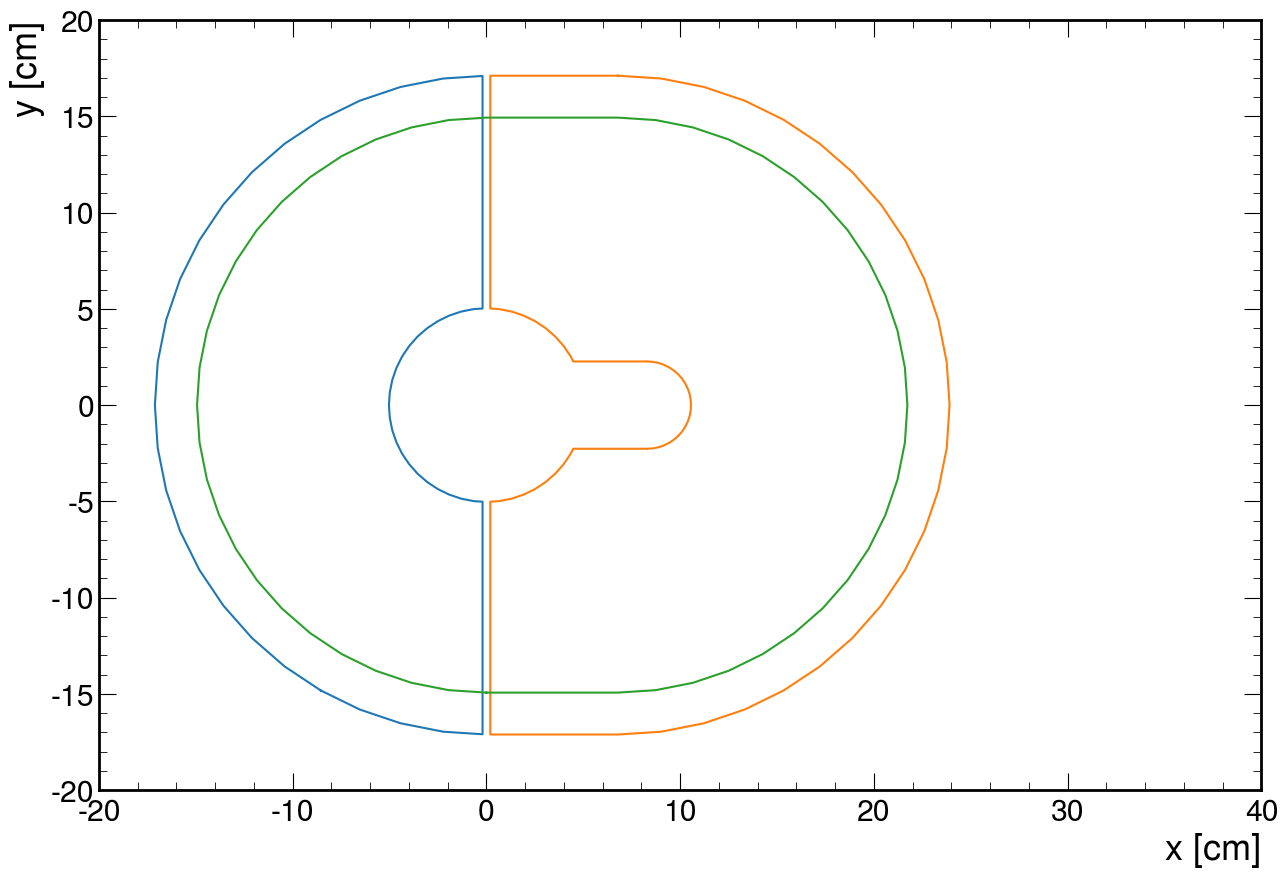

In [394]:
#now for the shadow plots!

plt.subplots(1,1, figsize=(15,10))
phi=np.linspace(-np.pi, np.pi, 49)
pipe1=shapely.Polygon(zip(R1*np.cos(phi), R1*np.sin(phi)))
pipe2=shapely.Polygon(zip(R2*np.cos(phi)+X2, R2*np.sin(phi)))




hole=pipe1.buffer(clearance) | pipe2.buffer(clearance)
#now for the flat extension:
hole |=rect(0, -R2-clearance, X2, R2+clearance)#shapely.Polygon([(0,-R2-clearance), (X2,-R2-clearance), (X2,R2+clearance),(X2,0), (0,0)])

circ1 = shapely.Polygon(zip(outer_radius*np.cos(phi), outer_radius*np.sin(phi)))
rect1=  rect(0, -outer_radius, horizontal_extension, outer_radius)
circ2 = shapely.Polygon(zip(horizontal_extension+outer_radius*np.cos(phi), outer_radius*np.sin(phi)))
both_halves=(circ1 | rect1 | circ2) \
        -hole - rect(-LRgap/2, -outer_radius*1.1, LRgap/2, outer_radius*1.1)
left_half = both_halves.geoms[0]
right_half = both_halves.geoms[1]

#ECAL
ECAL_radius=flange_radius+ECAL_clearance
s=320/195
circ1 = shapely.Polygon(zip(s*ECAL_radius*np.cos(phi), s*ECAL_radius*np.sin(phi)))
circ2 = shapely.Polygon(zip(s*ECAL_radius*np.cos(phi)+horizontal_extension, s*ECAL_radius*np.sin(phi)))
rect1= rect(0, -s*ECAL_radius, horizontal_extension, s*ECAL_radius)
ECAL_shadow = circ1 | circ2 | rect1
arg={}

#flange at -120 cm
s=320/120
circ=



plt.plot(*left_half.exterior.xy,**arg)
plt.plot(*right_half.exterior.xy,**arg)
plt.plot(*shadow.exterior.xy,**arg)

plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.xlim(-20, 40)
plt.ylim(-20, 20)



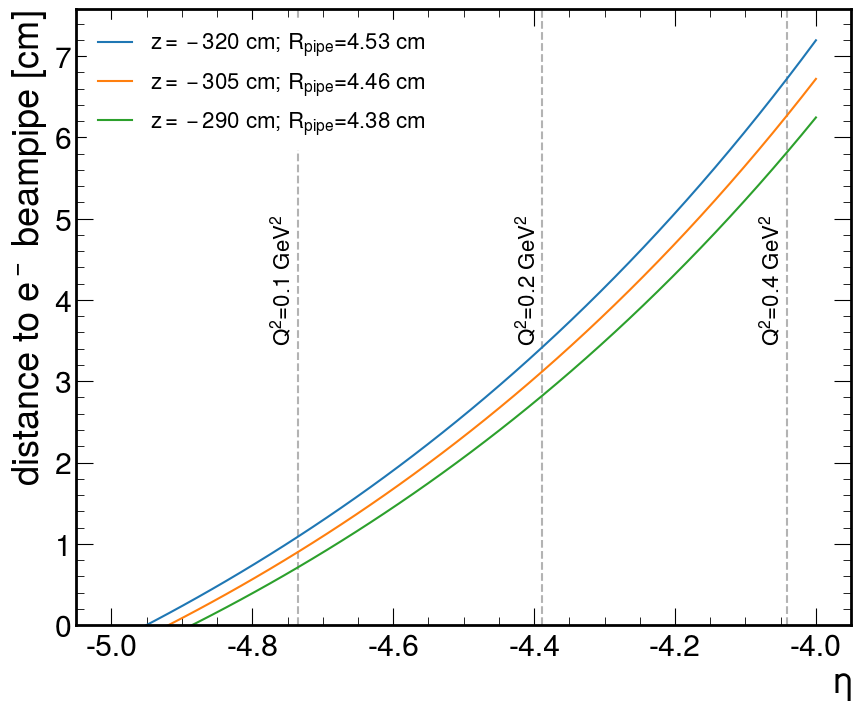

In [134]:
plt.subplots(1,1,figsize=(10,8))
eta=np.linspace(-5.0, -4.0, 50)

for z in -320, -305,-290:
    Rbp=4.281+(4.21-4.281)*(z-(-269.72))/14.21
    r=np.tan(get_theta(eta))*z
    plt.plot(eta,r-Rbp, label=f'$z={z}$ cm; $R_{{pipe}}$={Rbp:.2f} cm')

plt.xlabel("$\\eta$")
plt.ylabel("distance to $e^-$ beampipe [cm]")
    
plt.ylim(0)


Eb=18

for Q2 in 0.1, 0.2, 0.4:
    eta=1/2*np.log(Q2/(4*Eb**2))
    plt.axvline(eta, ls='--', color='0.7', zorder=-1)
    plt.text(eta-.04, 3.5, f"$Q^2$={Q2} GeV$^2$", rotation=90, fontsize=16)

plt.legend(fontsize=16, facecolor='white', framealpha=1, frameon=1, edgecolor='w')
plt.savefig("images/distance_to_beampipe.pdf")
plt.show()

In [136]:
for z in -270, -400:
    R1a=4.281+(4.21-4.281)*(z-(-269.72))/14.21
    R2a=1.574+(1.519-1.574)*(z-(-269.72))/14.21
    X2a=6.825+(6.407-6.825)*(z-(-269.72))/14.21
    print(f"z: {z:.0f}   R1: {R1a:.2f}  X2:  {X2a:.2f} R2: {R2a:.2f}")

z: -270   R1: 4.28  X2:  6.83 R2: 1.58
z: -400   R1: 4.93  X2:  10.66 R2: 2.08


In [137]:
4.93/4.28

1.1518691588785046

In [138]:
10.66-6.83

3.83

In [139]:
2.08/1.58

1.3164556962025316